In [3]:
pip install tensorflow

     |████████████████████████████████| 241.2 MB 31 kB/s  eta 0:00:017
     |████████████████████████████████| 5.9 MB 37.4 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 33.7 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 14.5 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 12.3 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 54.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 40.9 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 3.9 MB/s  eta 0:00:01
     |████████████████████████████████| 3.5 MB 42.7 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 62.5 MB/s eta 0:00:01
     |████████████████████████████████| 151 kB 37.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np

2022-10-23 20:41:25.128434: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
#Funktion för att visualisera bild och korrekt siffra
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_shape), cmap='binary')
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [15]:
#Funktion för att visa felen
def plot_example_errors(cls_pred):
    incorrect = (cls_pred != y_test)
    ims = x_test_flat[incorrect]
    cls_pred = cls_pred[incorrect]
    cls_true = y_test[incorrect]
    plot_images(images=ims[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

Ladda data. Datamängden MNIST dataset innehåller 70000 handskrivna siffror med facit.

In [16]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Formatera data för att passa classificeraren 
img_shape = [x_train.shape[1],x_train.shape[2]]
img_shape

[28, 28]

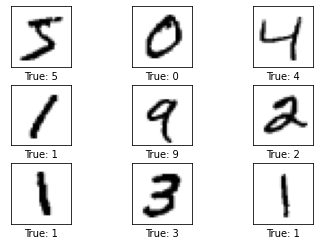

In [17]:
test_images = x_train[0:9]
classes_true = y_train[0:9]
plot_images(test_images, classes_true)

In [18]:
#För att effektivisera minneshanteringen
batch_size = 128
#Antalet klasser som kan klassificeras
num_classes = 10
#Antal träningssessioner
epochs = 20




## Förprocessering

In [19]:
# Skala om test och träningsdata för att passa algoritmen
x_train_flat = x_train.reshape(60000, 784)
x_test_flat = x_test.reshape(10000, 784)

# Ändra typ till float 
x_train_flat = x_train_flat.astype('float32')
x_test_flat = x_test_flat.astype('float32')

# Normalisera data 
x_train_flat /= 255
x_test_flat /= 255

# Dela upp data i 6000 för träning och 1000 för test. Konvertera till binära matriser 
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

print(x_train_flat.shape[0], 'training samples')
print(x_test_flat.shape[0], 'test samples')

60000 training samples
10000 test samples


## Definiera ett neuralt nätverk med 3 lager, 512 neuroner i de två första lagren och 10 (motsvarande de 10 möjliga siffror som kan vara output) i det tredje och sista lagret

In [21]:
#Instansiera ett neuralt nätverk
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Spriv ut en summering av vårt neurala nätverk.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


2022-10-23 21:05:39.281116: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Ok, då tränar vi vårt nätverk:

In [22]:
# Epochs är alltså antalet gånger vi låter nätverket träna på vårt träningsdata. 
epochs = 1

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train_cat,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_flat, y_test_cat))
score = model.evaluate(x_test_flat, y_test_cat, verbose=0)
print('Test loss:', score[0])
print('Test accuracy, the percentage of digits we predict accurately is :', 100*score[1], '%')

469/469 [==============================] - 3s 6ms/step - loss: 0.2206 - accuracy: 0.9314 - val_loss: 0.0987 - val_accuracy: 0.9692
Test loss: 0.09868845343589783
Test accuracy, the percentage of digits we predict accurately is : 96.92000150680542 %


In [23]:
predictions = model.predict(x_test_flat)
class_pred = np.argmax(predictions, axis=1)

313/313 [==============================] - 0s 1ms/step


Bra prediktioner:

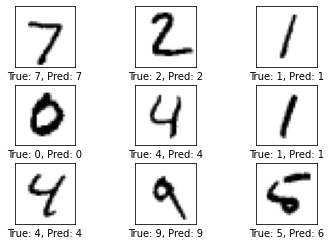

In [24]:
plot_images(x_test_flat[0:9], y_test[0:9], class_pred[0:9])

Felaktiga prediktioner:

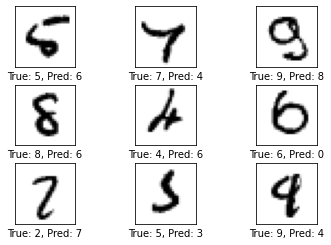

In [25]:
plot_example_errors(class_pred)

In [26]:
# Confusion matrix. Kod direkt från SKLEARN 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')


313/313 [==============================] - 0s 1ms/step


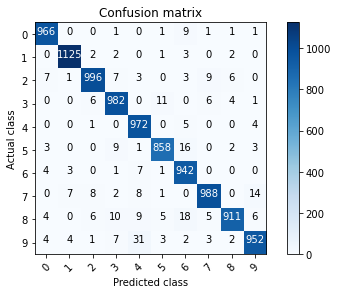

In [27]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test_flat)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test_cat, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))